# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math
import pprint

# Import API key
from api_keys import weather_api_key, weather_api_key_ben

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
output_data_file

'output_data/cities.csv'

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#query link
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key_ben}&units={units}&q="

In [4]:
#Loop over cities
#f string to structure
#use mod for record
# Data Frame for later

city_api_df = pd.DataFrame(columns=["City", "Country", "Latitude", "Longitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"])
print(f"Beginning Data Retrieval\n" \
"-----------------------------")
counter = 0
records = 50
for city in cities:
    current_record = (counter % records) + 1
    current_set = math.ceil((counter + 1) / records)
    try:
        response = requests.get(query_url + str(city)).json()
        if response["cod"] == 200:
            print(f"Processing Record {current_record} of Set {current_set} | {city}")
            city_api_df = city_api_df.append({
                "City": response["name"],
                "Country": response['sys']['country'],
                "Latitude": response["coord"]["lat"],
                "Longitude": response["coord"]["lon"],
                "Temperature (F)": response["main"]["temp"],
                "Humidity (%)": response["main"]["humidity"],
                "Cloudiness (%)": response["clouds"]["all"],
                "Wind Speed (mph)": response["wind"]["speed"]
            }, ignore_index=True)
        else:
            raise ValueError()
    except ValueError:
        print(f"Error processing {city}.")
    counter += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | amapa
Processing Record 6 of Set 1 | coihueco
Processing Record 7 of Set 1 | stokmarknes
Processing Record 8 of Set 1 | necochea
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | port shepstone
Processing Record 17 of Set 1 | ixtapa
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | chuy
Error processing belushya guba.
Processing Record 21 of Set 1 | palmer
Processing Record 22 of Set 1 | ancud
Processing Record 23 of Set 1 | umba
Processing Record 24 of Se

Processing Record 6 of Set 5 | belle fourche
Processing Record 7 of Set 5 | komsomolskiy
Error processing kamenskoye.
Processing Record 9 of Set 5 | great falls
Error processing warqla.
Processing Record 11 of Set 5 | tura
Processing Record 12 of Set 5 | uelzen
Processing Record 13 of Set 5 | moose factory
Processing Record 14 of Set 5 | sao filipe
Processing Record 15 of Set 5 | kishtwar
Processing Record 16 of Set 5 | esna
Processing Record 17 of Set 5 | liusha
Processing Record 18 of Set 5 | cockburn town
Processing Record 19 of Set 5 | kahului
Processing Record 20 of Set 5 | kampene
Processing Record 21 of Set 5 | kaeo
Processing Record 22 of Set 5 | maneadero
Processing Record 23 of Set 5 | kruisfontein
Processing Record 24 of Set 5 | kabompo
Processing Record 25 of Set 5 | okhotsk
Processing Record 26 of Set 5 | ocean city
Processing Record 27 of Set 5 | misratah
Processing Record 28 of Set 5 | laguna
Processing Record 29 of Set 5 | pevek
Processing Record 30 of Set 5 | fairbanks

Error processing palabuhanratu.
Processing Record 11 of Set 9 | valparaiso
Processing Record 12 of Set 9 | dali
Processing Record 13 of Set 9 | kloulklubed
Processing Record 14 of Set 9 | hereford
Processing Record 15 of Set 9 | evensk
Processing Record 16 of Set 9 | mukhen
Processing Record 17 of Set 9 | kolobrzeg
Processing Record 18 of Set 9 | tortoli
Processing Record 19 of Set 9 | kostomuksha
Processing Record 20 of Set 9 | jijiga
Processing Record 21 of Set 9 | presidencia roque saenz pena
Processing Record 22 of Set 9 | chicama
Processing Record 23 of Set 9 | nortelandia
Processing Record 24 of Set 9 | wuhu
Processing Record 25 of Set 9 | senador jose porfirio
Processing Record 26 of Set 9 | general pico
Processing Record 27 of Set 9 | mahanoro
Processing Record 28 of Set 9 | blagoyevo
Processing Record 29 of Set 9 | svetlaya
Processing Record 30 of Set 9 | makurdi
Processing Record 31 of Set 9 | enid
Processing Record 32 of Set 9 | port augusta
Error processing saleaula.
Proces

Processing Record 12 of Set 13 | rondonopolis
Processing Record 13 of Set 13 | srandakan
Processing Record 14 of Set 13 | tarko-sale
Processing Record 15 of Set 13 | teya
Processing Record 16 of Set 13 | maseru
Processing Record 17 of Set 13 | uberlandia
Processing Record 18 of Set 13 | barrhead


In [5]:
city_api_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,PF,-23.12,-134.97,72.72,77,43,9.53
1,Busselton,AU,-33.65,115.33,72.95,30,73,13.96
2,Hithadhoo,MV,-0.60,73.08,82.27,59,70,1.57
3,Puerto Ayora,EC,-0.74,-90.35,68.00,86,100,5.99
4,Amapá,BR,1.00,-52.00,69.48,98,13,2.26


In [6]:
# Testing code above, bug fixing except not triggering.
len(city_api_df)

569

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_api_df.to_csv(output_data_file, index = False)

In [8]:
city_api_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,PF,-23.12,-134.97,72.72,77,43,9.53
1,Busselton,AU,-33.65,115.33,72.95,30,73,13.96
2,Hithadhoo,MV,-0.60,73.08,82.27,59,70,1.57
3,Puerto Ayora,EC,-0.74,-90.35,68.00,86,100,5.99
4,Amapá,BR,1.00,-52.00,69.48,98,13,2.26


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
city_api_df[(city_api_df["Humidity (%)"] > 100)].index

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [11]:
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(f"Graphs/{title}.png", dpi=100)
    plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

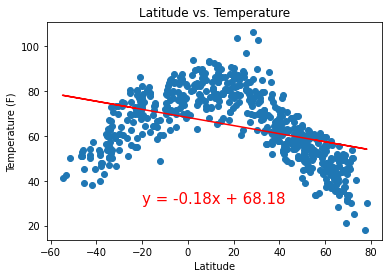

In [12]:
city_api_df["Temperature (F)"] = city_api_df["Temperature (F)"].fillna(0)
x_values = city_api_df["Latitude"]
y_values = city_api_df["Temperature (F)"]
title = "Latitude vs. Temperature"
x_label = "Latitude"
y_label = "Temperature (F)"
text_coordinates = (-20,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Latitude vs. Humidity Plot

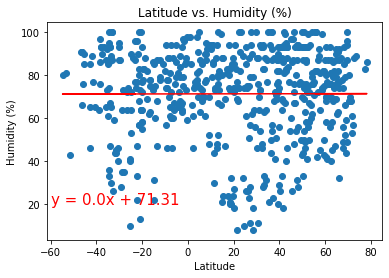

In [13]:
city_api_df["Humidity (%)"] = city_api_df["Humidity (%)"].fillna(0)
x_values = city_api_df["Latitude"]
y_values = city_api_df["Humidity (%)"]
title = "Latitude vs. Humidity (%)"
x_label = "Latitude"
y_label = "Humidity (%)"
text_coordinates = (-60,20)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Latitude vs. Cloudiness Plot

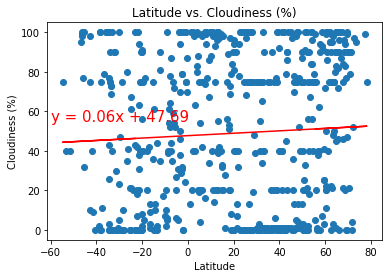

In [14]:
city_api_df["Cloudiness (%)"] = city_api_df["Cloudiness (%)"].fillna(0)
x_values = city_api_df["Latitude"]
y_values = city_api_df["Cloudiness (%)"]
title = "Latitude vs. Cloudiness (%)"
x_label = "Latitude"
y_label = "Cloudiness (%)"
text_coordinates = (-60,55)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Latitude vs. Wind Speed Plot

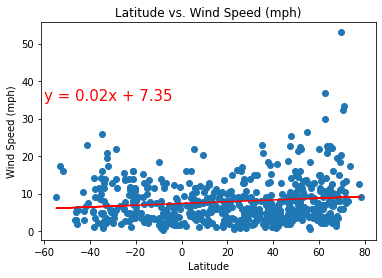

In [15]:
city_api_df["Wind Speed (mph)"] = city_api_df["Wind Speed (mph)"].fillna(0)
x_values = city_api_df["Latitude"]
y_values = city_api_df["Wind Speed (mph)"]
title = "Latitude vs. Wind Speed (mph)"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
text_coordinates = (-60,35)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Linear Regression

In [16]:
# Already complete

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

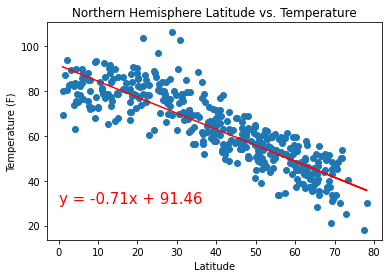

In [17]:
north_hemi = city_api_df[city_api_df["Latitude"] > 0]
x_values = north_hemi["Latitude"]
y_values = north_hemi["Temperature (F)"]
title = "Northern Hemisphere Latitude vs. Temperature"
x_label = "Latitude"
y_label = "Temperature (F)" 
text_coordinates = (0,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

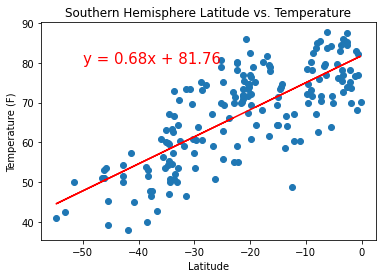

In [18]:
south_hemi = city_api_df[city_api_df["Latitude"] < 0]
x_values = south_hemi["Latitude"]
y_values = south_hemi["Temperature (F)"]
title = "Southern Hemisphere Latitude vs. Temperature"
x_label = "Latitude"
y_label = "Temperature (F)" 
text_coordinates = (-50,80)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

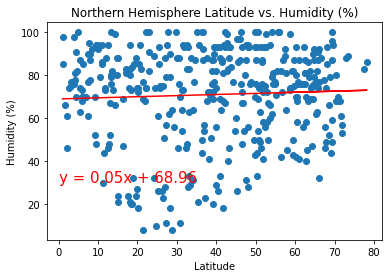

In [19]:
north_hemi = city_api_df[city_api_df["Latitude"] > 0]
x_values = north_hemi["Latitude"]
y_values = north_hemi["Humidity (%)"]
title = "Northern Hemisphere Latitude vs. Humidity (%)"
x_label = "Latitude"
y_label = "Humidity (%)" 
text_coordinates = (0,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

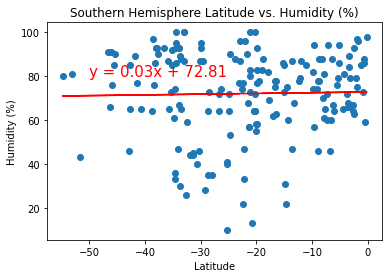

In [20]:
south_hemi = city_api_df[city_api_df["Latitude"] < 0]
x_values = south_hemi["Latitude"]
y_values = south_hemi["Humidity (%)"]
title = "Southern Hemisphere Latitude vs. Humidity (%)"
x_label = "Latitude"
y_label = "Humidity (%)" 
text_coordinates = (-50,80)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

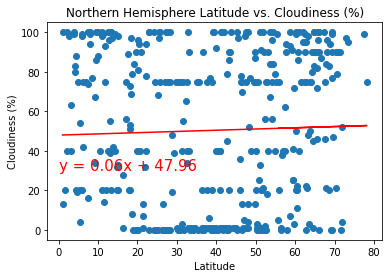

In [21]:
north_hemi = city_api_df[city_api_df["Latitude"] > 0]
x_values = north_hemi["Latitude"]
y_values = north_hemi["Cloudiness (%)"]
title = "Northern Hemisphere Latitude vs. Cloudiness (%)"
x_label = "Latitude"
y_label = "Cloudiness (%)" 
text_coordinates = (0,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

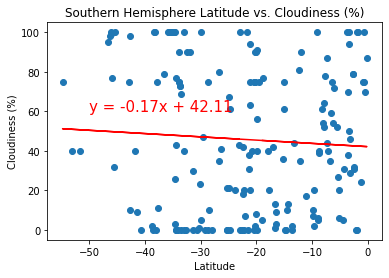

In [22]:
south_hemi = city_api_df[city_api_df["Latitude"] < 0]
x_values = south_hemi["Latitude"]
y_values = south_hemi["Cloudiness (%)"]
title = "Southern Hemisphere Latitude vs. Cloudiness (%)"
x_label = "Latitude"
y_label = "Cloudiness (%)" 
text_coordinates = (-50,60)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

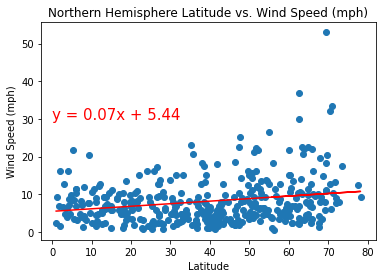

In [23]:
north_hemi = city_api_df[city_api_df["Latitude"] > 0]
x_values = north_hemi["Latitude"]
y_values = north_hemi["Wind Speed (mph)"]
title = "Northern Hemisphere Latitude vs. Wind Speed (mph)"
x_label = "Latitude"
y_label = "Wind Speed (mph)" 
text_coordinates = (0,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

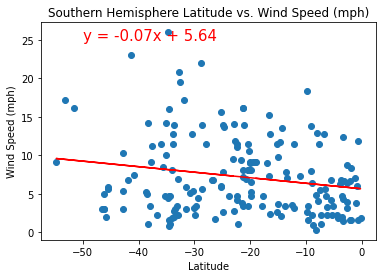

In [24]:
south_hemi = city_api_df[city_api_df["Latitude"] < 0]
x_values = south_hemi["Latitude"]
y_values = south_hemi["Wind Speed (mph)"]
title = "Southern Hemisphere Latitude vs. Wind Speed (mph)"
x_label = "Latitude"
y_label = "Wind Speed (mph)" 
text_coordinates = (-50,25)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)